In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os

country_profiles_file = "country_profile_variables.csv"



In [29]:
# loading csv file and putting into dataframe

country_data = pd.read_csv(country_profiles_file)
country_data.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99


In [30]:
gender_df = pd.DataFrame(country_data.loc[:,["country", "Region", "GDP: Gross domestic product (million current US$)", "GDP per capita (current US$)", 'Seats held by women in national parliaments %', 'Labour force participation (female/male pop. %)']])
gender_df = gender_df.set_index("Labour force participation (female/male pop. %)")
gender_df = gender_df.rename(columns={"country": "Country"})

# Cleaning the data to drop values ".../..." and "-99".
gender_df = gender_df.dropna(how="any")
gender_df = gender_df.drop(".../...", axis = 0)
gender_df = gender_df.drop("-99", axis = 0)

# Changing index to new column and removing -99 values
gender_df = gender_df.reset_index()
gender_df = gender_df.set_index("GDP: Gross domestic product (million current US$)")
gender_df = gender_df.drop('-99', axis = 0)

gender_df = gender_df.reset_index()
gender_df = gender_df.set_index("GDP per capita (current US$)")
gender_df = gender_df.drop("-99", axis = 0)

gender_df = gender_df.reset_index()
gender_df = gender_df.set_index("Seats held by women in national parliaments %")
gender_df = gender_df.drop("-99", axis = 0)

gender_df = gender_df.reset_index()
gender_df = gender_df.set_index("Country")
gender_df = gender_df.drop("Liechtenstein", axis = 0)

In [31]:
# splitting labour force participation to seperate columns
gender_list = list(gender_df["Labour force participation (female/male pop. %)"])
new_gender_list = [value.split("/") for value in gender_list]
male_part = [float(value[0]) for value in new_gender_list]
female_part = [float(value[1]) for value in new_gender_list]

# print(new_gender_list)
# print(male_part)
# print(female_part)

In [32]:
# adding new columns into dataframe
gender_df.drop(["Labour force participation (female/male pop. %)"], axis = 1, inplace = True)
gender_df["Male Labour Force Participation %"] = male_part
gender_df["Female Labour Force Participation %"] = female_part
gender_df = gender_df[["Region", 
                       "GDP: Gross domestic product (million current US$)", 
                       "GDP per capita (current US$)",
                       "Seats held by women in national parliaments %",
                       "Male Labour Force Participation %",
                       "Female Labour Force Participation %"]]


gender_df.head()

,Region,GDP: Gross domestic product (million current US$),GDP per capita (current US$),Seats held by women in national parliaments %,Male Labour Force Participation %,Female Labour Force Participation %
Country,,,,,,
Afghanistan,SouthernAsia,20270,623.2,27.7,19.3,83.6
Albania,SouthernEurope,11541,3984.2,22.9,40.2,61.0
Algeria,NorthernAfrica,164779,4154.1,31.6,17.0,70.7
Angola,MiddleAfrica,117955,4714.1,38.2,59.8,77.1
Argentina,SouthAmerica,632343,14564.5,38.9,48.6,74.4


Text(0.5,1,'GDP per capita vs % Female Parliament Participation')

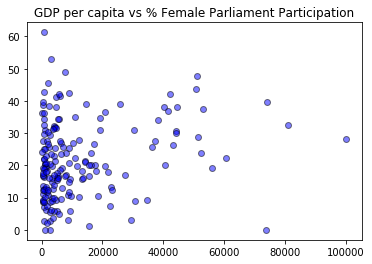

In [33]:
plt.scatter(gender_df["GDP per capita (current US$)"], 
            gender_df["Seats held by women in national parliaments %"], 
            marker = "o", color = "blue", 
            edgecolor = "black", 
            alpha = 0.5)
plt.title("GDP per capita vs % Female Parliament Participation")

In [34]:
gender_df["Seats held by women in national parliaments %"].describe()

count    179.000000
mean      21.568715
std       11.879972
min        0.000000
25%       12.600000
50%       20.000000
75%       29.800000
max       61.300000
Name: Seats held by women in national parliaments %, dtype: float64

In [35]:
environ_df = country_data.loc[:,["country", 
                                 "Region",
                                 "GDP: Gross domestic product (million current US$)", 
                                 "GDP per capita (current US$)",
                                 'Threatened species (number)',
                                 'Forested area (% of land area)',
                                 'CO2 emission estimates (million tons/tons per capita)',
                                 'Pop. using improved drinking water (urban/rural, %)',
                                 'Pop. using improved sanitation facilities (urban/rural, %)',
                                 'Energy production, primary (Petajoules)']]

In [36]:
environ_df = environ_df.set_index("GDP: Gross domestic product (million current US$)")
environ_df = environ_df.drop('-99', axis = 0)

environ_df = environ_df.reset_index()
environ_df = environ_df.set_index("Pop. using improved sanitation facilities (urban/rural, %)")
environ_df = environ_df.drop('-99', axis = 0)

environ_df = environ_df.reset_index()
environ_df = environ_df.set_index("CO2 emission estimates (million tons/tons per capita)")
environ_df = environ_df.drop('-99', axis = 0)

environ_df = environ_df.reset_index()
environ_df = environ_df.set_index("Pop. using improved drinking water (urban/rural, %)")
environ_df = environ_df.drop('.../...', axis = 0)
environ_df = environ_df.drop('-99', axis = 0)
environ_df = environ_df.drop('100.0/100.0', axis = 0)

environ_df = environ_df.reset_index()
environ_df = environ_df.set_index('Threatened species (number)')
environ_df = environ_df.drop('~0.0', axis = 0)


environ_df = environ_df.rename(columns={"country":"Country"})
environ_df = environ_df.reset_index()
environ_df = environ_df.set_index("Country")

In [37]:
water_list = list(environ_df["Pop. using improved drinking water (urban/rural, %)"])
new_water_list = [value.split("/") for value in water_list]

urban_water = [float(value[0]) for value in new_water_list]
rural_water = [float(value[1]) for value in new_water_list]

environ_df["% Pop. using improved drinking water (urban)"] = urban_water
environ_df["% Pop. using improved drinking water (rural)"] = rural_water

environ_df.drop("Pop. using improved drinking water (urban/rural, %)", axis = 1, inplace = True)
environ_df.drop("Forested area (% of land area)", axis = 1, inplace = True)
environ_df.drop("Pop. using improved sanitation facilities (urban/rural, %)", axis = 1, inplace = True)



cleaned_environ_df = environ_df[["Region", 
                         "GDP: Gross domestic product (million current US$)", 
                         "GDP per capita (current US$)",
                         "CO2 emission estimates (million tons/tons per capita)",
                         "% Pop. using improved drinking water (urban)", 
                         "% Pop. using improved drinking water (rural)", 
                         "Threatened species (number)",
                         "Energy production, primary (Petajoules)",]]

cleaned_environ_df["Threatened species (number)"] = pd.to_numeric(cleaned_environ_df["Threatened species (number)"])

cleaned_environ_df.head()


,Region,GDP: Gross domestic product (million current US$),GDP per capita (current US$),CO2 emission estimates (million tons/tons per capita),% Pop. using improved drinking water (urban),% Pop. using improved drinking water (rural),Threatened species (number),"Energy production, primary (Petajoules)"
Country,,,,,,,,
Afghanistan,SouthernAsia,20270,623.2,63,45.1,27.0,2.1,5
Albania,SouthernEurope,11541,3984.2,84,95.5,90.2,28.2,36
Algeria,NorthernAfrica,164779,4154.1,5900,89.8,82.2,0.8,55
Angola,MiddleAfrica,117955,4714.1,3902,88.6,22.5,46.5,25
Argentina,SouthAmerica,632343,14564.5,3167,96.2,98.3,10.0,85


In [41]:
# Perhaps groupby region and run aggregate functions to see where the cleanest places are and whether they correlate to GDP

grouped_env = cleaned_environ_df.groupby("Region")
grouped_gdp = grouped_env["GDP per capita (current US$)"].sum()

grouped_species = round(grouped_env["CO2 emission estimates (million tons/tons per capita)"].mean(), 2)

env_df = pd.DataFrame(grouped_gdp)
env_df["CO2 emission estimates (million tons/tons per capita)"] = grouped_species
env_df = env_df.reset_index()
# print(grouped_gdp)
# print(grouped_species)
env_df.head()

,Region,GDP per capita (current US$),CO2 emission estimates (million tons/tons per capita)
0,Caribbean,71195.2,256.12
1,CentralAmerica,50785.1,1159.12
2,CentralAsia,12344.4,2415.67
3,EasternAfrica,36577.5,328.00
4,EasternAsia,12082.5,51035.50


([<matplotlib.axis.XTick at 0x11e70c4e0>,
 <a list of 18 Text xticklabel objects>)

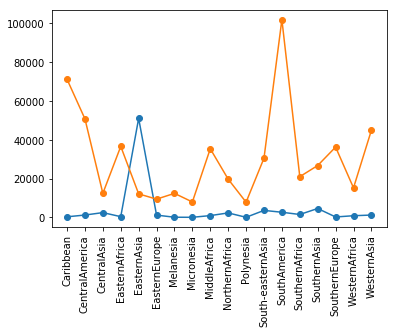

In [48]:
plt.plot(env_df["Region"], env_df["CO2 emission estimates (million tons/tons per capita)"], marker = "o")
plt.plot(env_df["Region"], env_df["GDP per capita (current US$)"], marker = "o")

plt.xticks(env_df["Region"], env_df["Region"], rotation="vertical")